In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python


import os 
import requests
import glob
import pathlib  
import pandas as pd 
import numpy as py 
import tensorflow as tf
import PIL
from tensorflow import keras
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense

from keras import Model
from keras import layers
from keras import Sequential
from keras import backend as K
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os

batch_size = 500
img_width = 224
img_height = 224

dataset_url =  "../input/fire-dataset/fire_dataset"

data_dir = pathlib.Path(dataset_url)
image_count = len(list(data_dir.glob('*/*.png'))) ##making a list of images through dir 
print(image_count)


fire_images = list(data_dir.glob('fire_images/*')) #making a list of fire images through dir 
fire_count = image_count = len(list(data_dir.glob('fire_images/*')))
print(fire_count)



non_fire_images = list(data_dir.glob('non_fire_images/*')) #making a list of non fire images through dir 
non_fire_count = image_count = len(list(data_dir.glob('non_fire_images/*')))
print(non_fire_count)
# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session



In [14]:
#split into train and test to ration of 20% 80% 

train_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

test_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 999 files belonging to 2 classes.
Using 800 files for training.
Found 999 files belonging to 2 classes.
Using 199 files for validation.


In [19]:
class_names = train_ds.class_names #types of classification 
print(class_names)

['fire_images', 'non_fire_images']


In [24]:
#types of classifications 
class_names = train_ds.class_names
print(class_names)


#use seq model to specify the hidden layers 
model = Sequential([
  layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(len(class_names))
])



model.compile(optimizer=tf.keras.optimizers.Adam(0.001),loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

['fire_images', 'non_fire_images']


In [25]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
rescaling_5 (Rescaling)      (None, 224, 224, 3)       0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 224, 224, 16)      448       
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 112, 112, 16)      0         
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 112, 112, 32)      4640      
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 56, 56, 32)        0         
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 56, 56, 64)        18496     
_________________________________________________________________
max_pooling2d_17 (MaxPooling (None, 28, 28, 64)       

In [26]:
epochs= 20 #model fitting 
my_model = model.fit(
  train_ds,
  validation_data=test_ds,
  epochs=epochs
)

Epoch 1/20


Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...


2/2 [==============================] - ETA: 0s - loss: 2.4058 - accuracy: 0.6513 

Cleanup called...


2/2 [==============================] - 23s 6s/step - loss: 2.4058 - accuracy: 0.6513 - val_loss: 1.7051 - val_accuracy: 0.7538
Epoch 2/20


Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...


2/2 [==============================] - ETA: 0s - loss: 1.2840 - accuracy: 0.7425 

Cleanup called...


2/2 [==============================] - 20s 6s/step - loss: 1.2840 - accuracy: 0.7425 - val_loss: 0.7982 - val_accuracy: 0.2965
Epoch 3/20


Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...


2/2 [==============================] - ETA: 0s - loss: 0.7509 - accuracy: 0.4000 

Cleanup called...


2/2 [==============================] - 20s 6s/step - loss: 0.7509 - accuracy: 0.4000 - val_loss: 0.5692 - val_accuracy: 0.8040
Epoch 4/20


Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...


2/2 [==============================] - ETA: 0s - loss: 0.5450 - accuracy: 0.7950 

Cleanup called...


2/2 [==============================] - 20s 6s/step - loss: 0.5450 - accuracy: 0.7950 - val_loss: 0.5115 - val_accuracy: 0.7538
Epoch 5/20


Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...


2/2 [==============================] - ETA: 0s - loss: 0.5027 - accuracy: 0.7563 

Cleanup called...


2/2 [==============================] - 20s 6s/step - loss: 0.5027 - accuracy: 0.7563 - val_loss: 0.5070 - val_accuracy: 0.7538
Epoch 6/20


Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...


2/2 [==============================] - ETA: 0s - loss: 0.4791 - accuracy: 0.7563 

Cleanup called...


2/2 [==============================] - 20s 6s/step - loss: 0.4791 - accuracy: 0.7563 - val_loss: 0.4011 - val_accuracy: 0.7688
Epoch 7/20


Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...


2/2 [==============================] - ETA: 0s - loss: 0.3790 - accuracy: 0.8012 

Cleanup called...


2/2 [==============================] - 23s 7s/step - loss: 0.3790 - accuracy: 0.8012 - val_loss: 0.3433 - val_accuracy: 0.9347
Epoch 8/20


Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
2022-09-17 22:08:11.206345: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:175] Filling up shuffle buffer (this may take a while): 780 of 4000
2022-09-17 22:08:11.319511: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:228] Shuffle buffer filled.


2/2 [==============================] - ETA: 0s - loss: 0.3330 - accuracy: 0.9388 

Cleanup called...


2/2 [==============================] - 22s 6s/step - loss: 0.3330 - accuracy: 0.9388 - val_loss: 0.2806 - val_accuracy: 0.8342
Epoch 9/20


Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...


2/2 [==============================] - ETA: 0s - loss: 0.2685 - accuracy: 0.8575 

Cleanup called...


2/2 [==============================] - 22s 6s/step - loss: 0.2685 - accuracy: 0.8575 - val_loss: 0.2296 - val_accuracy: 0.9246
Epoch 10/20


Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...


2/2 [==============================] - ETA: 0s - loss: 0.2326 - accuracy: 0.9262 

Cleanup called...


2/2 [==============================] - 20s 6s/step - loss: 0.2326 - accuracy: 0.9262 - val_loss: 0.2029 - val_accuracy: 0.9548
Epoch 11/20


Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...


2/2 [==============================] - ETA: 0s - loss: 0.1978 - accuracy: 0.9425 

Cleanup called...


2/2 [==============================] - 20s 6s/step - loss: 0.1978 - accuracy: 0.9425 - val_loss: 0.2535 - val_accuracy: 0.9095
Epoch 12/20


Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...


2/2 [==============================] - ETA: 0s - loss: 0.1959 - accuracy: 0.9275 

Cleanup called...


2/2 [==============================] - 20s 6s/step - loss: 0.1959 - accuracy: 0.9275 - val_loss: 0.1609 - val_accuracy: 0.9497
Epoch 13/20


Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...


2/2 [==============================] - ETA: 0s - loss: 0.1631 - accuracy: 0.9438 

Cleanup called...


2/2 [==============================] - 20s 6s/step - loss: 0.1631 - accuracy: 0.9438 - val_loss: 0.1551 - val_accuracy: 0.9246
Epoch 14/20


Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...


2/2 [==============================] - ETA: 0s - loss: 0.1465 - accuracy: 0.9463 

Cleanup called...


2/2 [==============================] - 20s 6s/step - loss: 0.1465 - accuracy: 0.9463 - val_loss: 0.2255 - val_accuracy: 0.9246
Epoch 15/20


Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...


2/2 [==============================] - ETA: 0s - loss: 0.1424 - accuracy: 0.9438 

Cleanup called...


2/2 [==============================] - 20s 6s/step - loss: 0.1424 - accuracy: 0.9438 - val_loss: 0.1513 - val_accuracy: 0.9447
Epoch 16/20


Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...


2/2 [==============================] - ETA: 0s - loss: 0.1283 - accuracy: 0.9450 

Cleanup called...


2/2 [==============================] - 20s 6s/step - loss: 0.1283 - accuracy: 0.9450 - val_loss: 0.1501 - val_accuracy: 0.9447
Epoch 17/20


Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...


2/2 [==============================] - ETA: 0s - loss: 0.1142 - accuracy: 0.9513 

Cleanup called...


2/2 [==============================] - 20s 6s/step - loss: 0.1142 - accuracy: 0.9513 - val_loss: 0.2412 - val_accuracy: 0.9246
Epoch 18/20


Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...


2/2 [==============================] - ETA: 0s - loss: 0.1268 - accuracy: 0.9425 

Cleanup called...


2/2 [==============================] - 20s 6s/step - loss: 0.1268 - accuracy: 0.9425 - val_loss: 0.1504 - val_accuracy: 0.9447
Epoch 19/20


Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...


2/2 [==============================] - ETA: 0s - loss: 0.1116 - accuracy: 0.9575 

Cleanup called...


2/2 [==============================] - 20s 6s/step - loss: 0.1116 - accuracy: 0.9575 - val_loss: 0.1480 - val_accuracy: 0.9497
Epoch 20/20


Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...


2/2 [==============================] - ETA: 0s - loss: 0.1035 - accuracy: 0.9613 

Cleanup called...


2/2 [==============================] - 20s 6s/step - loss: 0.1035 - accuracy: 0.9613 - val_loss: 0.1778 - val_accuracy: 0.9397


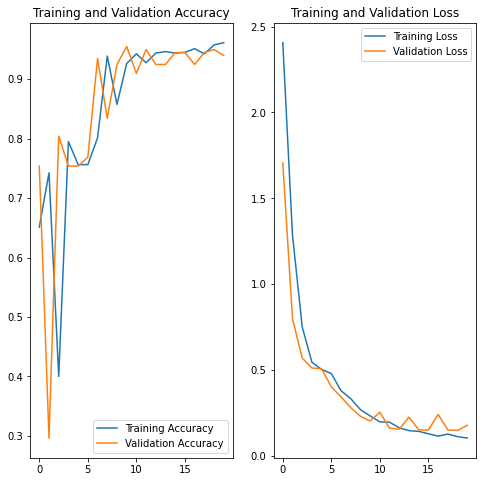

In [29]:
#data visuals through grpahs 
acc = my_model.history['accuracy']
val_acc = my_model.history['val_accuracy']

loss = my_model.history['loss']
val_loss = my_model.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [54]:
y_test_labels = []

for images, labels in test_ds.take(1):
    for i in range(199):
        temp_list = [0,0]
        temp_list[labels[i]] = 1
        y_test_labels.append(temp_list)
        
print(len(y_test_labels))
print(y_test_labels)

Cleanup called...


199
[[1, 0], [1, 0], [0, 1], [1, 0], [0, 1], [1, 0], [1, 0], [1, 0], [0, 1], [1, 0], [0, 1], [1, 0], [1, 0], [1, 0], [1, 0], [0, 1], [1, 0], [1, 0], [1, 0], [1, 0], [1, 0], [1, 0], [1, 0], [0, 1], [1, 0], [0, 1], [1, 0], [1, 0], [1, 0], [1, 0], [1, 0], [1, 0], [1, 0], [1, 0], [1, 0], [1, 0], [1, 0], [1, 0], [1, 0], [1, 0], [1, 0], [1, 0], [1, 0], [1, 0], [1, 0], [1, 0], [1, 0], [1, 0], [1, 0], [1, 0], [1, 0], [1, 0], [1, 0], [1, 0], [1, 0], [1, 0], [1, 0], [1, 0], [0, 1], [1, 0], [1, 0], [0, 1], [0, 1], [1, 0], [0, 1], [1, 0], [1, 0], [1, 0], [1, 0], [0, 1], [1, 0], [1, 0], [1, 0], [0, 1], [1, 0], [1, 0], [0, 1], [0, 1], [1, 0], [1, 0], [0, 1], [1, 0], [0, 1], [1, 0], [0, 1], [0, 1], [1, 0], [1, 0], [0, 1], [1, 0], [1, 0], [1, 0], [0, 1], [1, 0], [1, 0], [1, 0], [1, 0], [1, 0], [1, 0], [1, 0], [0, 1], [1, 0], [1, 0], [1, 0], [0, 1], [1, 0], [1, 0], [0, 1], [1, 0], [1, 0], [1, 0], [1, 0], [0, 1], [1, 0], [1, 0], [0, 1], [0, 1], [1, 0], [0, 1], [1, 0], [1, 0], [0, 1], [1, 0], [1, 0], [1,

In [78]:
pred = model.predict(test_ds)

pred_new_list_y = []

for sub_array in pred:
    temp_list = [0, 0]
    if sub_array[0] > sub_array[1]:
        temp_list[0] = 1
    else:
        temp_list[1] = 1
    pred_new_list_y.append(temp_list)


print(classification_report(y_test_labels, pred_new_list_y, target_names=test_ds.class_names))

Cleanup called...


                 precision    recall  f1-score   support

    fire_images       0.77      0.81      0.79       150
non_fire_images       0.29      0.24      0.27        49

      micro avg       0.67      0.67      0.67       199
      macro avg       0.53      0.53      0.53       199
   weighted avg       0.65      0.67      0.66       199
    samples avg       0.67      0.67      0.67       199



In [82]:
model.save("sept-17-20H06.h5")